In [24]:
import pandas as pd
import numpy as np


# read text file into pandas DataFrame
mark = pd.read_csv("/content/marks.txt")
  
# display DataFrame
print(mark)


    4.62365962451697  78.0246928153624  0
0          30.286711         43.894998  0
1          35.847409         72.902198  0
2          60.182599         86.308552  1
3          79.032736         75.344376  1
4          45.083277         56.316372  0
..               ...               ... ..
94         83.489163         48.380286  1
95         42.261701         87.103851  1
96         99.315009         68.775409  1
97         55.340018         64.931938  1
98         74.775893         89.529813  1

[99 rows x 3 columns]


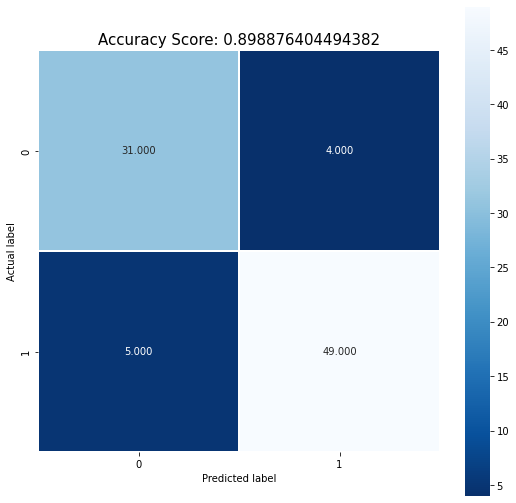

In [29]:
from sklearn import linear_model
X = mark.iloc[:,0:2]
y = mark.iloc[:,2]

train_x = X[:80]
train_y = y[:80]

test_x = X[10:]
test_y = y[10:]

logr = linear_model.LogisticRegression()
logr.fit(train_x,train_y)

pred = logr.predict(test_x)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

score = logr.score(test_x, test_y)
cm = metrics.confusion_matrix(test_y, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [30]:
from scipy import stats

weight = 0.1
bias = 0.01
def pred(x):
  return weight * x + bias

pred(test_x)

def cost_func(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
    
cost_func(y,pred(test_x))

4.62365962451697    0.0
78.0246928153624    0.0
0                   0.0
1                   0.0
2                   0.0
                   ... 
94                  0.0
95                  0.0
96                  0.0
97                  0.0
98                  0.0
Length: 101, dtype: float64

In [31]:
def normal_equ(x,y):
  a = np.dot(x.T,x)
  b = np.linalg.pinv(a)
  c = np.dot(b, x.T)
  theta = np.dot(c, y)
  return theta
  
normal_equ(X,y)

array([0.00556658, 0.00436593])

In [32]:
import random
def reg(y,y_pred,lamda, theta,m):
  E = 1/(2*m)/(np.sum(y_pred-y)**2 + lamda*np.sum(theta**2))
  return E

X2 = reg(y,pred(X),0.01,random.random(),len(y))
reg(y,pred(X2),0.01,random.random(),len(y))

1.906884347740698e-05